In [14]:
import pandas as pd
import numpy as np
import re

In [15]:
from tesserocr import PyTessBaseAPI
from PIL import Image,ImageOps,ImageFilter
import cv2

In [3]:
def anglefinder(image):
    invgray= ImageOps.invert(imggray)
    invpix= invgray.load()
    for i in range(invgray.size[0]):
        for j in range(invgray.size[1]):
            if invpix[i,j]>100:
                invpix[i,j]=255
            else:
                invpix[i,j]=0
    coords = np.column_stack(np.where(np.float32(invgray) > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    return angle

In [23]:
def aadhar_number(imagename,rad,pix):
    img_gb= imagename.filter(ImageFilter.GaussianBlur(radius = rad)) 
    imgpix= img_gb.load()
    for i in range(img_gb.size[0]):
        for j in range(img_gb.size[1]):
            if imgpix[i,j]> pix:
                imgpix[i,j]=255
            else:
                imgpix[i,j]=0
    img_gb.save('fin3.jpg')
    with PyTessBaseAPI(path='D:/Tesseract-OCR/tessdata/.', lang='eng') as api:
        api.SetImageFile('fin3.jpg')
        textsamp= api.GetUTF8Text()
    textspl= textsamp.split('\n')
    d=0
    k=0
    for i in range(len(textspl)):
        if re.search('[0-9]',textspl[i]):
            k=i
            for j in range(len(textspl[i])): 
                if textspl[i][j].isnumeric():
                    d=d+1
            if d>10:
                break        
        else:
            textspl[k]= ''
    return [d,textspl[k]];

In [42]:
def aadhar_number_UID(imggray2):
    angle= anglefinder(imggray)
    if np.absolute(angle)<2:
        for p in range(1,4,2):
            for q in range(70,150):
                d= aadhar_number(imggray2,p,q)[0]
                string = aadhar_number(imggray2,p,q)[1]
                if d>11:
                    temp = re.findall(r'\d+', string) 
                    res = list(map(int, temp))
                    UID=''
                    for j in range(len(res)):
                        UID= UID+' '+str(res[j])
                    return UID
                else:
                    imggray2= imggray2.rotate(90,expand=True)
                    d= aadhar_number(imggray2,p,q)[0]
                    string= aadhar_number(imggray2,p,q)[1]
                    if d>11:
                        temp = re.findall(r'\d+', string) 
                        res = list(map(int, temp))
                        UID=''
                        for j in range(len(res)):
                            UID= UID+' '+str(res[j])
                        return UID
                    else:
                        imggray2= imggray2.rotate(90,expand=True)
                        d= aadhar_number(imggray2,p,q)[0]
                        string= aadhar_number(imggray2,p,q)[1]
                        if d>11:
                            temp = re.findall(r'\d+', string) 
                            res = list(map(int, temp))
                            UID=''
                            for j in range(len(res)):
                                UID= UID+' '+str(res[j])
                            return UID
                        else:
                            imggray2= imggray2.rotate(90,expand=True)
                            d= aadhar_number(imggray2,p,q)[0]
                            string= aadhar_number(imggray2,p,q)[1]
                            if d>11:
                                temp = re.findall(r'\d+', string) 
                                res = list(map(int, temp))
                                UID=''
                                for j in range(len(res)):
                                    UID= UID+' '+str(res[j])
                                return UID
                            else:
                                UID= 'Aadhar number can not be extracted'

        

    else:
        imggray2= imggray2.rotate(angle)
        for p in range(1,4,2):
            for q in range(70,150):
                d= aadhar_number(imggray2,p,q)[0]
                string= aadhar_number(imggray2,p,q)[1]
                if d>11:
                    temp = re.findall(r'\d+', string) 
                    res = list(map(int, temp))
                    UID=''
                    for j in range(len(res)):
                        UID= UID+' '+str(res[j])
                    return UID
                else:
                    imggray2= imggray2.rotate(90,expand=True)
                    d= aadhar_number(imggray2,p,q)[0]
                    string= aadhar_number(imggray2,p,q)[1]
                    if d>11:
                        temp = re.findall(r'\d+', string) 
                        res = list(map(int, temp))
                        UID=''
                        for j in range(len(res)):
                            UID= UID+' '+str(res[j])
                        return UID
                    else:
                        imggray2= imggray2.rotate(90,expand=True)
                        d= aadhar_number(imggray2,p,q)[0]
                        string= aadhar_number(imggray2,p,q)[1]
                        if d>11:
                            temp = re.findall(r'\d+', string) 
                            res = list(map(int, temp))
                            UID=''
                            for j in range(len(res)):
                                UID= UID+' '+str(res[j])
                            return UID
                        else:
                            imggray2= imggray2.rotate(90,expand=True)
                            d= aadhar_number(imggray2,p,q)[0]
                            string= aadhar_number(imggray2,p,q)[1]
                            if d>11:
                                temp = re.findall(r'\d+', string) 
                                res = list(map(int, temp))
                                UID=''
                                for j in range(len(res)):
                                    UID= UID+' '+str(res[j])
                                return UID
                            else:
                                UID= 'Aadhar number can not be extracted'

In [6]:
#1st image

In [7]:
imgopen= Image.open('D:/Downloads/aadhartask1.jpg')
imggray= imgopen.convert('L')

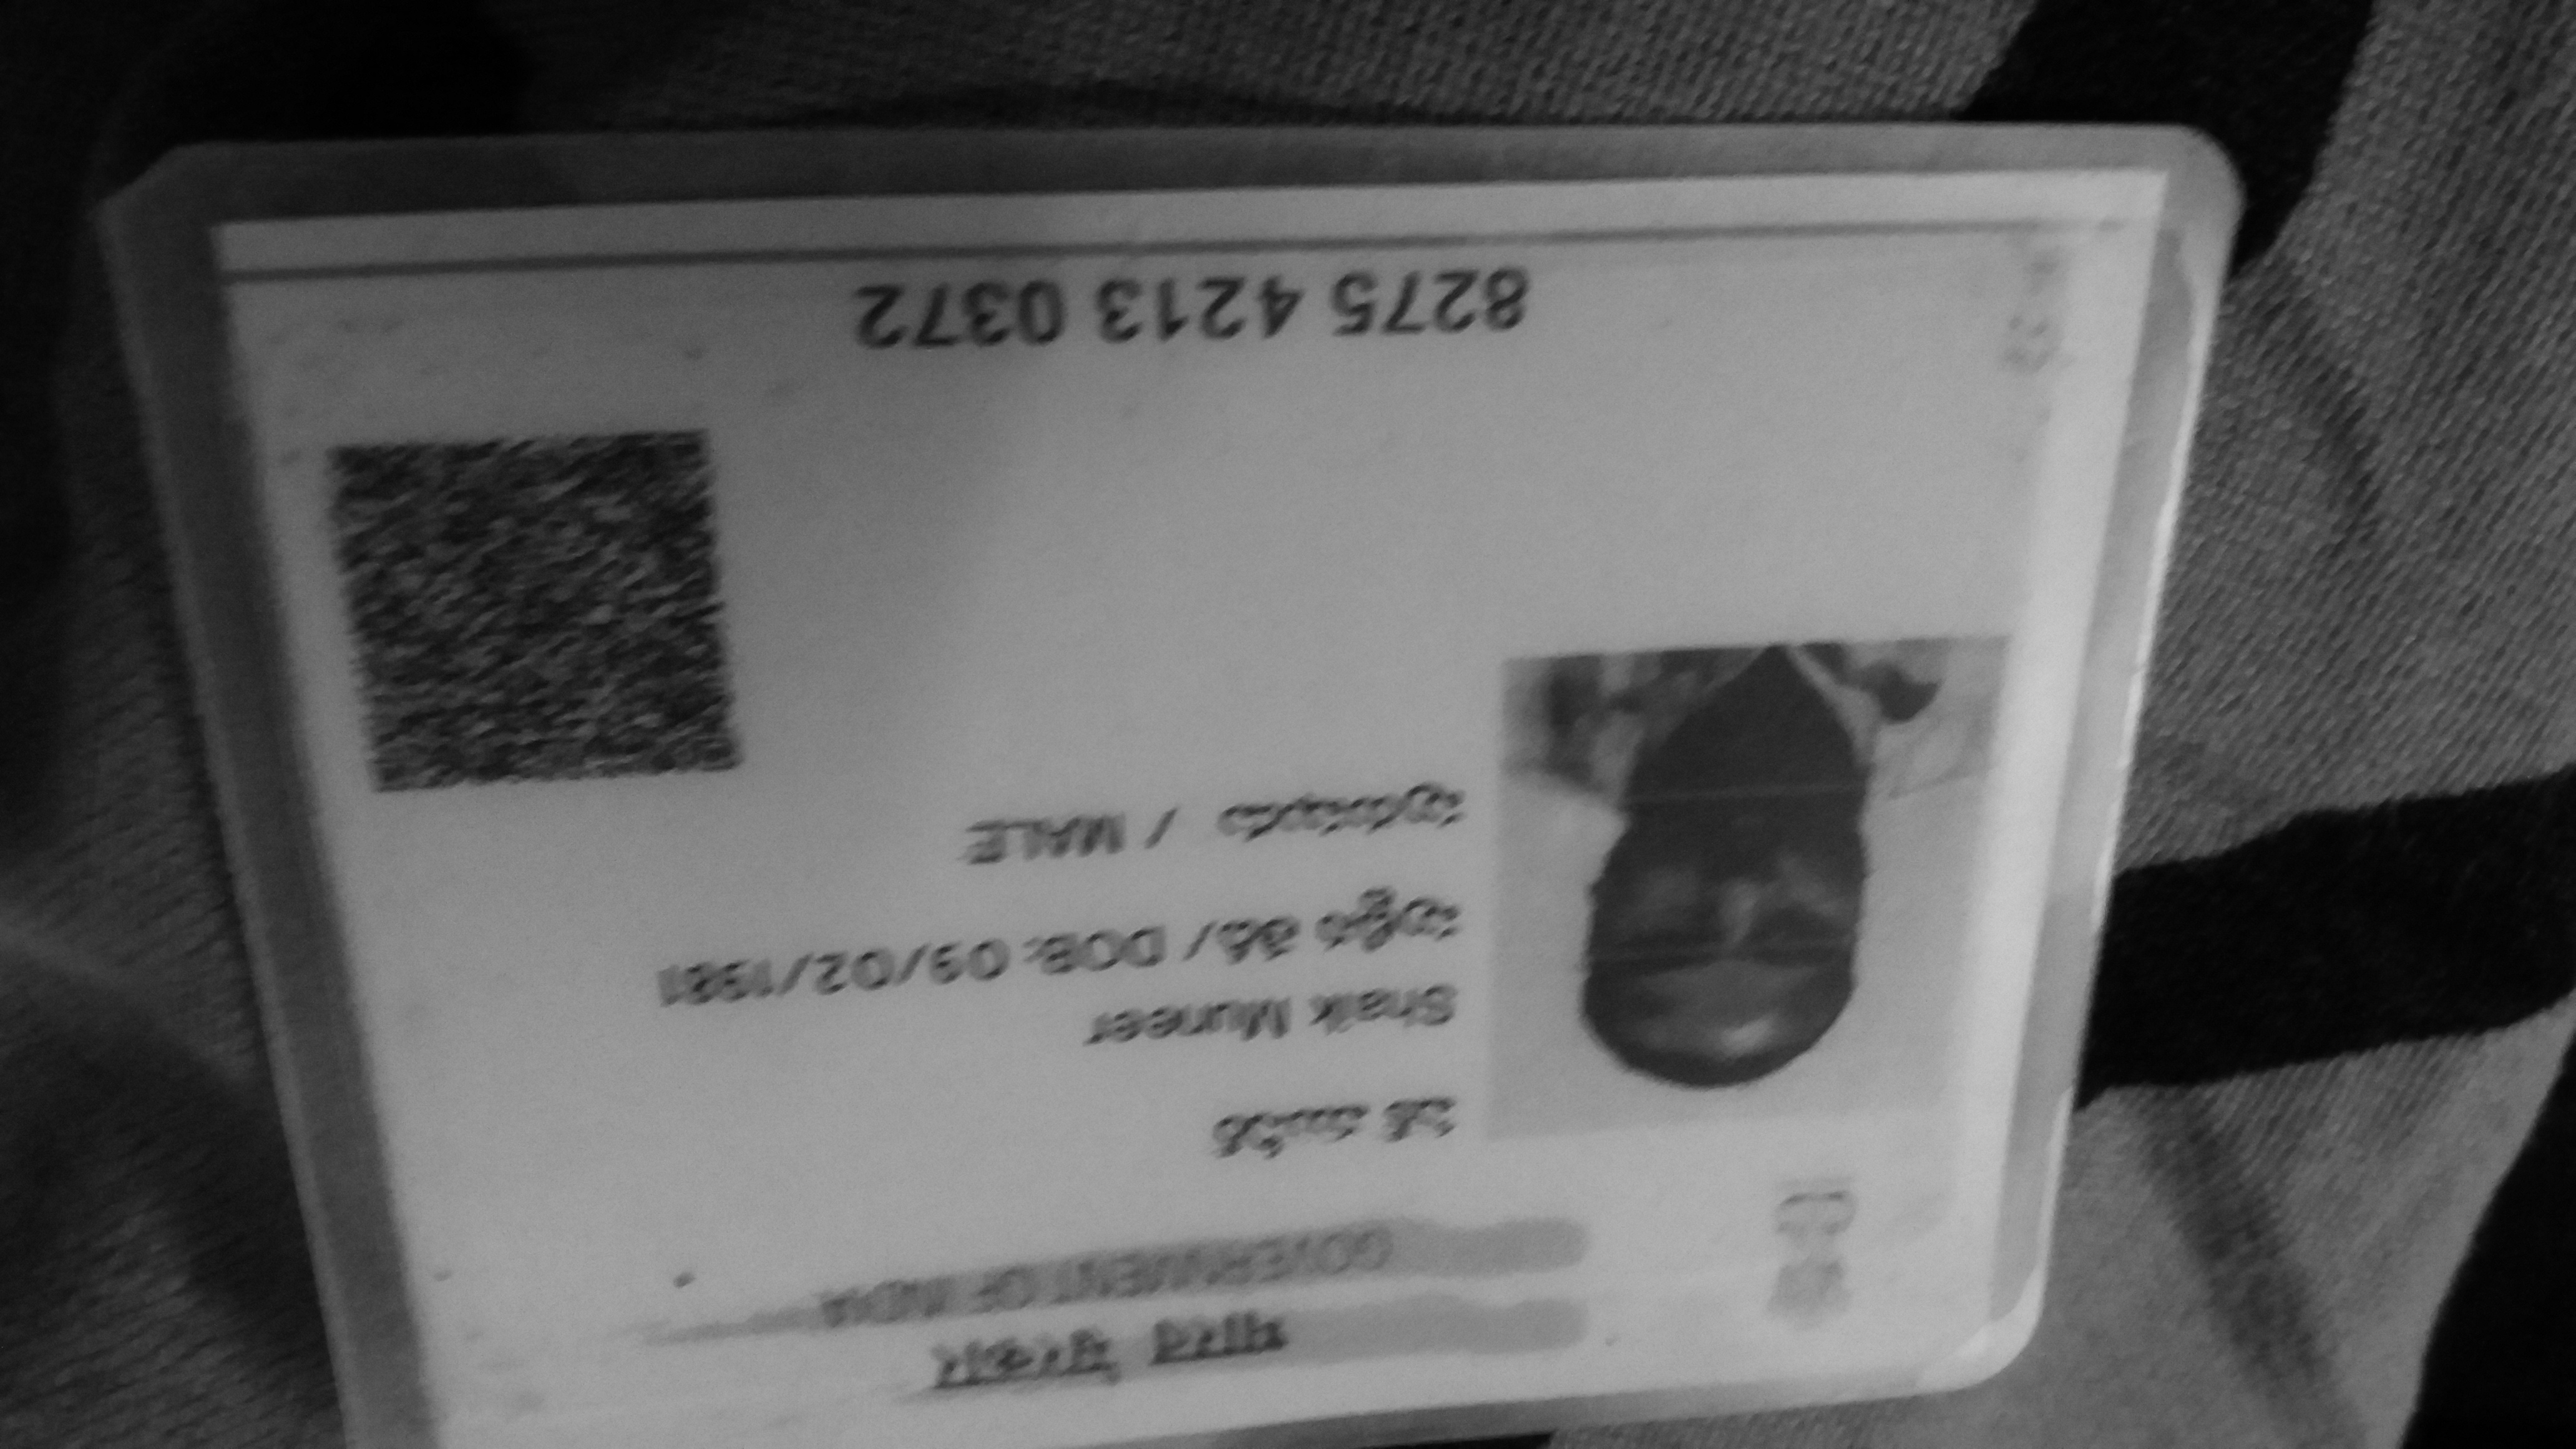

In [8]:
imggray

In [9]:
original= ' 8275 4213 0372'

In [16]:
number= aadhar_number_UID(imggray)
f=0
for t in range(len(number)):
    if number[t].isnumeric():
        f=f+1
if f>9:
    print(number)
else:
    imggray= imggray.crop((0,0,testgray2.size[0]*0.5,testgray2.size[1]*0.35))
    number=  aadhar_number_UID(imggray)
    print(number)

 4275 4213 372


In [17]:
import difflib
accuracy1= difflib.SequenceMatcher(None, number, original).ratio()
accuracy1*100

89.65517241379311

In [18]:
#2nd image

In [43]:
imgopen= Image.open('D:/Downloads/aadhartask2.jpg')
imggray= imgopen.convert('L')

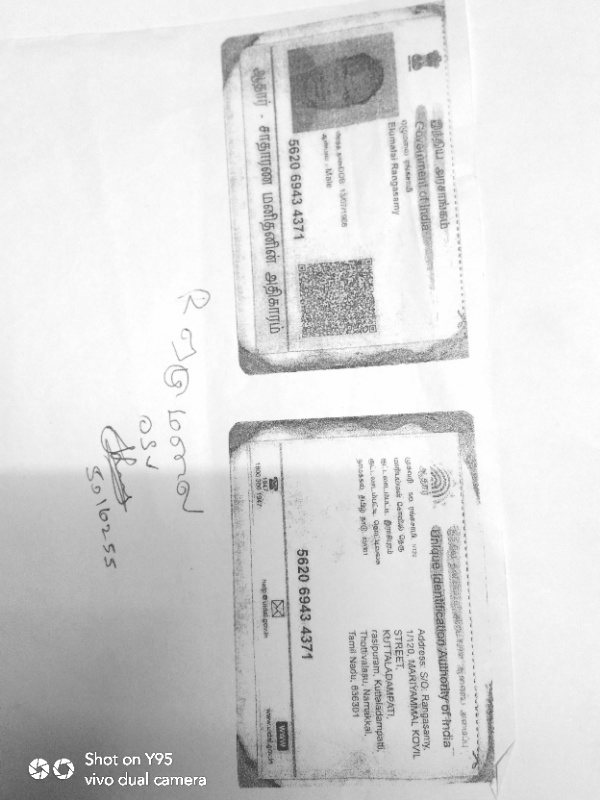

In [20]:
imggray

In [44]:
original= ' 5620 6943 4371'

In [45]:
number= aadhar_number_UID(imggray)
f=0
for t in range(len(number)):
    if number[t].isnumeric():
        f=f+1
if f>9:
    print(number)
else:
    imggray= imggray.crop((0,0,testgray2.size[0]*0.5,testgray2.size[1]*0.35))
    number=  aadhar_number_UID(imggray)
    print(number)

 5620 6943 4374


In [46]:
accuracy2= difflib.SequenceMatcher(None, number, original).ratio()
accuracy2*100

93.33333333333333

In [26]:
#3rd image

In [31]:
imgopen= Image.open('D:/Downloads/aadhartask4.jpg')
imggray= imgopen.convert('L')

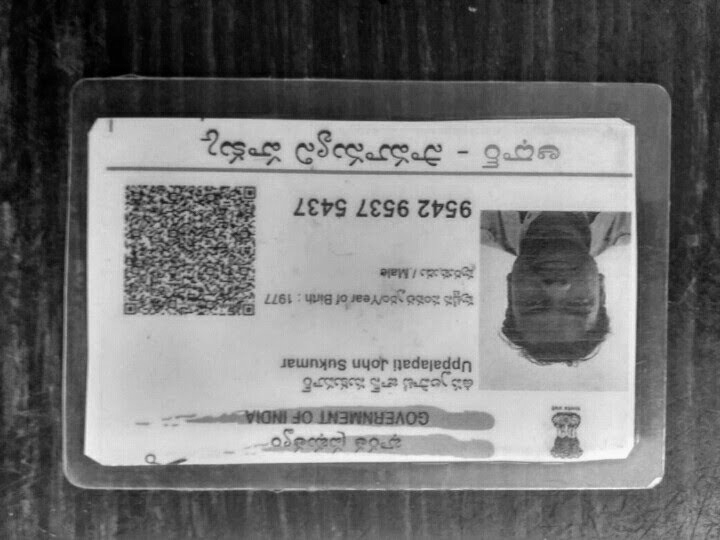

In [32]:
imggray

In [33]:
original= ' 9542 9537 5437'

In [34]:
number= aadhar_number_UID(imggray)
f=0
for t in range(len(number)):
    if number[t].isnumeric():
        f=f+1
if f>9:
    print(number)
else:
    imggray= imggray.crop((0,0,testgray2.size[0]*0.5,testgray2.size[1]*0.35))
    number=  aadhar_number_UID(imggray)
    print(number)

 9542 9537 5437


In [35]:
accuracy3= difflib.SequenceMatcher(None, number, original).ratio()
accuracy3*100

100.0

In [36]:
#4th image

In [47]:
imgopen= Image.open('D:/Downloads/aadhartask5.png')
imggray= imgopen.convert('L')

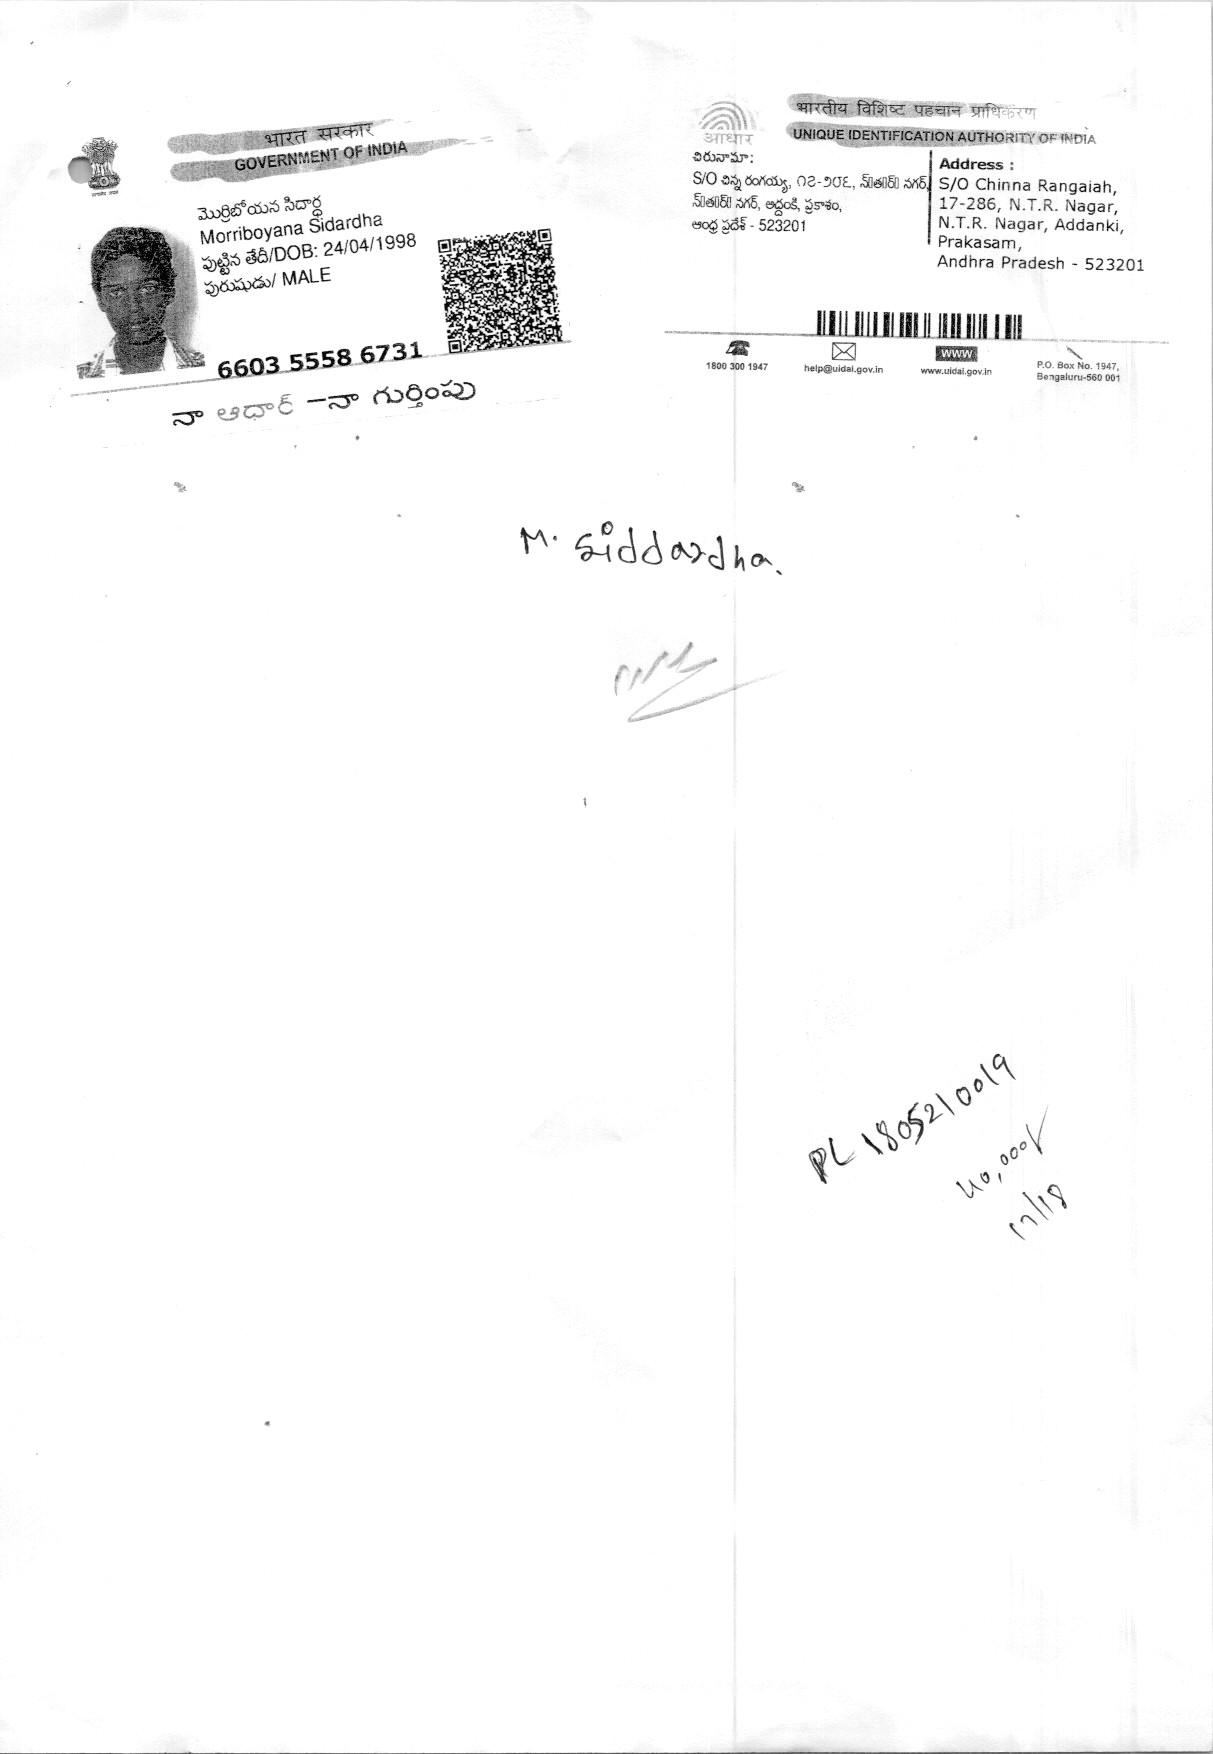

In [38]:
imggray

In [48]:
original= ' 6603 5558 6731'

In [49]:
number= aadhar_number_UID(imggray)
f=0
for t in range(len(number)):
    if number[t].isnumeric():
        f=f+1
if f>9:
    print(number)
else:
    imggray= imggray.crop((0,0,testgray2.size[0]*0.5,testgray2.size[1]*0.35))
    number=  aadhar_number_UID(imggray)
    print(number)

 6603 5958 6734


In [50]:
accuracy4= difflib.SequenceMatcher(None, number, original).ratio()
accuracy4*100

86.66666666666667

In [52]:
average_accuracy= (accuracy1+ accuracy2+ accuracy3+ accuracy4)*100 / 4
average_accuracy

92.41379310344827